In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telecom = pd.read_csv("Churn Final_data.csv")
telecom

,Unnamed: 0,account_length,voice_mail_messages,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,0,128,25,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,1,107,26,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,3,84,0,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,4,75,0,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,5695,75,0,1,1,78,37.81,111,27.80,104,9.36,9,2.35,77.32,1
5696,5696,115,0,2,1,110,20.74,100,18.72,124,8.09,2,2.92,50.47,1
5697,5697,145,0,1,0,116,41.79,91,24.37,115,10.83,13,2.43,79.42,1
5698,5698,69,33,1,1,98,46.16,102,21.54,85,7.44,2,2.21,77.35,1


In [3]:
telecom = telecom.drop("Unnamed: 0",axis=1)

In [4]:
telecom

,account_length,voice_mail_messages,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,25,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,26,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,75,0,1,1,78,37.81,111,27.80,104,9.36,9,2.35,77.32,1
5696,115,0,2,1,110,20.74,100,18.72,124,8.09,2,2.92,50.47,1
5697,145,0,1,0,116,41.79,91,24.37,115,10.83,13,2.43,79.42,1
5698,69,33,1,1,98,46.16,102,21.54,85,7.44,2,2.21,77.35,1


# Feature and Target

In [5]:
X = telecom.drop("churn",axis=1).values
y = telecom["churn"]

In [6]:
X

array([[128.  ,  25.  ,   1.  , ...,   3.  ,   2.7 ,  75.56],
       [107.  ,  26.  ,   1.  , ...,   3.  ,   3.7 ,  59.24],
       [137.  ,   0.  ,   0.  , ...,   5.  ,   3.29,  62.29],
       ...,
       [145.  ,   0.  ,   1.  , ...,  13.  ,   2.43,  79.42],
       [ 69.  ,  33.  ,   1.  , ...,   2.  ,   2.21,  77.35],
       [123.  ,   0.  ,   4.  , ...,   6.  ,   1.7 ,  45.34]])

In [7]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5695    1
5696    1
5697    1
5698    1
5699    1
Name: churn, Length: 5700, dtype: int64

# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

# Train and Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=0)

In [11]:
X_train.shape,X_test.shape

((4275, 13), (1425, 13))

In [12]:
y_train.shape,y_test.shape

((4275,), (1425,))

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model1=lg.fit(X_train,y_train)
pred1=model1.predict(X_test)

In [14]:
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix
print(f1_score(y_test,pred1))
print(precision_score(y_test,pred1))
print(recall_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(np.mean(y_test==pred1))

0.7645390070921985
0.7834302325581395
0.7465373961218836
[[554 149]
 [183 539]]
0.7670175438596492


<AxesSubplot:>

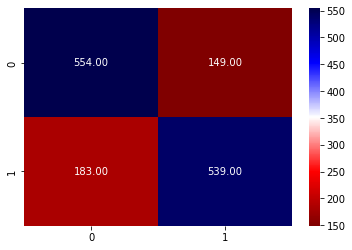

In [15]:
sns.heatmap(confusion_matrix(y_test,pred1), annot=True, fmt='.2f', cmap='seismic_r')

# ROC - AUC For Logistic Regression

In [16]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,thresh = roc_curve(y_test,pred1)
a = auc(fpr,tpr)
a

0.7672943026128622

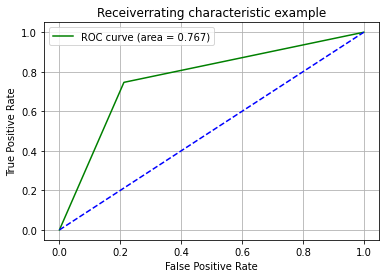

In [17]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % a,color="green")
plt.plot([0, 1], [0, 1], '--',color="blue")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.grid()
plt.legend()
plt.show()

# K-Nearest Neighbors Algorithm(KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model2=knn.fit(X_train,y_train)
pred2=model2.predict(X_test)

In [19]:
print(f1_score(y_test,pred2))
print(precision_score(y_test,pred2))
print(recall_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(np.mean(y_test==pred2))

0.9043250327653997
0.8582089552238806
0.9556786703601108
[[589 114]
 [ 32 690]]
0.8975438596491228


<AxesSubplot:>

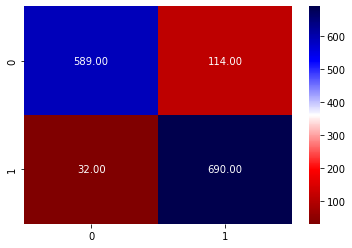

In [20]:
sns.heatmap(confusion_matrix(y_test,pred2), annot=True, fmt='.2f', cmap='seismic_r')

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model3=rf.fit(X_train,y_train)
pred3=model3.predict(X_test)

In [22]:
print(f1_score(y_test,pred3))
print(precision_score(y_test,pred3))
print(recall_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(np.mean(y_test==pred3))

0.9979238754325259
0.9972337482710927
0.9986149584487535
[[701   2]
 [  1 721]]
0.9978947368421053


<AxesSubplot:>

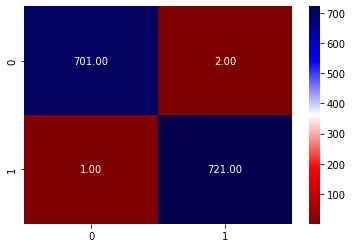

In [23]:
sns.heatmap(confusion_matrix(y_test,pred3), annot=True, fmt='.2f', cmap='seismic_r')

# Support Vector Machine(SVM)

In [24]:
from sklearn.svm import SVC
sv=SVC()
model4=sv.fit(X_train,y_train)
pred4=model4.predict(X_test)

In [25]:
print(f1_score(y_test,pred4))
print(precision_score(y_test,pred4))
print(recall_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print(np.mean(y_test==pred4))

0.8944723618090453
0.9284649776453056
0.8628808864265928
[[655  48]
 [ 99 623]]
0.8968421052631579


<AxesSubplot:>

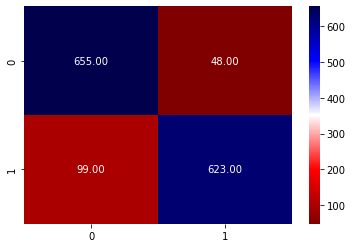

In [26]:
sns.heatmap(confusion_matrix(y_test,pred4), annot=True, fmt='.2f', cmap='seismic_r')

# Naive Bayes(NB)

In [27]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
model5=nb.fit(X_train,y_train)
pred5=model5.predict(X_test)

In [28]:
print(f1_score(y_test,pred5))
print(precision_score(y_test,pred5))
print(recall_score(y_test,pred5))
print(confusion_matrix(y_test,pred5))
print(np.mean(y_test==pred5))

0.8020378457059679
0.8450920245398773
0.7631578947368421
[[602 101]
 [171 551]]
0.8091228070175439


<AxesSubplot:>

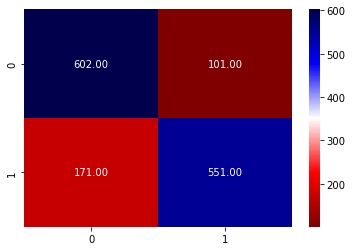

In [29]:
sns.heatmap(confusion_matrix(y_test,pred5), annot=True, fmt='.2f', cmap='seismic_r')

# XGboost

In [30]:
from xgboost import XGBClassifier
xg=XGBClassifier()
model6=xg.fit(X_train,y_train)
pred6=model6.predict(X_test)

In [31]:
print(f1_score(y_test,pred6))
print(precision_score(y_test,pred6))
print(recall_score(y_test,pred6))
print(confusion_matrix(y_test,pred6))
print(np.mean(y_test==pred6))

0.995169082125604
0.9917469050894085
0.9986149584487535
[[697   6]
 [  1 721]]
0.9950877192982456


<AxesSubplot:>

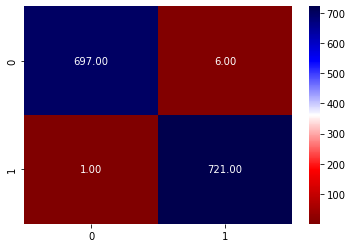

In [32]:
sns.heatmap(confusion_matrix(y_test,pred6), annot=True, fmt='.2f', cmap='seismic_r')

# Select Final Algorithm

In [33]:
print("FInal Model is Random forest with avg: 0.9985964912280701% ")

FInal Model is Random forest with avg: 0.9985964912280701% 


# HOW TO REDUCE CUSTOMER CHURN

# CONCLUSION